<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Simulaci-n-1/blob/main/estimacion_de_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt

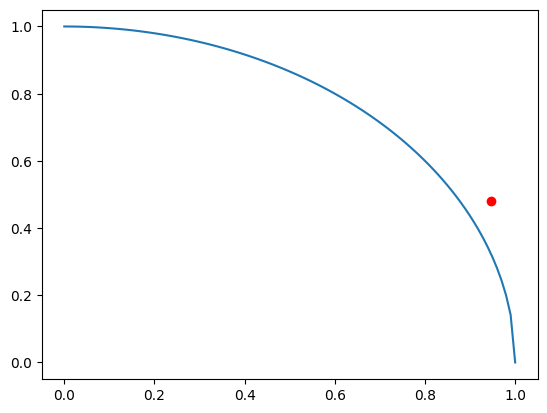

In [ ]:
x=np.linspace(0,1,100)
u1=rnd.random()
u2=rnd.random()
plt.plot(x,np.sqrt(1-x**2))
plt.scatter(u1,u2, color="red")
plt.show()

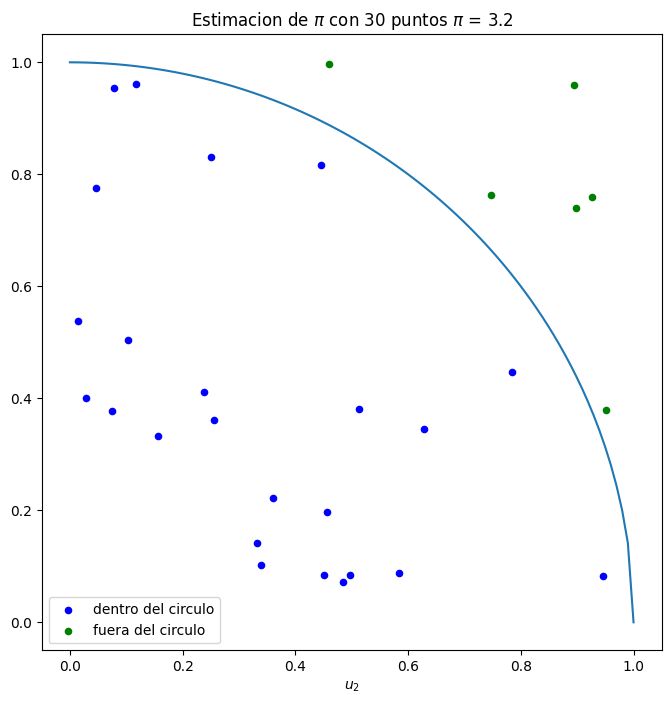

Estimacion de $\pi$ con 30 simulaciones:3.2


In [ ]:
def estimar_pi(N):
  puntos_dentro=0
  x_dentro=[]
  y_dentro=[]
  x_fuera=[]
  y_fuera=[]

  for _ in range(N):
    u1=random.uniform(0,1)
    u2=random.uniform(0,1)

    if u2<=math.sqrt(1-u1**2):
      puntos_dentro+=1
      x_dentro.append(u1)
      y_dentro.append(u2)

    else:
      x_fuera.append(u1)
      y_fuera.append(u2)

  pi_estimado=4*(puntos_dentro/N)

  #para grsficar los puntos
  plt.figure(figsize=(8,8))
  plt.scatter(x_dentro,y_dentro, color="blue",s=20, label="dentro del circulo")
  plt.scatter(x_fuera,y_fuera, color="green",s=20, label="fuera del circulo")
  plt.plot(x,np.sqrt(1-x**2))
  plt.xlabel("$u_1$")
  plt.xlabel("$u_2$")
  plt.title(f"Estimacion de $\pi$ con {N} puntos $\pi$ = {pi_estimado}")
  plt.legend()
  plt.show()

  return pi_estimado

#numero de simulaciones
N=30
pi_estimado=estimar_pi(N)
print(f"Estimacion de $\pi$ con {N} simulaciones:{pi_estimado}")


In [31]:
#algoritmo hecho por el maestro
def estimaciones(N):
  l=[]
  exitos=0
  for i in range (N):
    u1=rnd.uniform(0,1)
    u2=rnd.uniform(0,1)
    if u2<=np.sqrt(1-u1**2):
      exitos+=1
    prob=exitos/(i+1)
    l.append(prob)
  return l


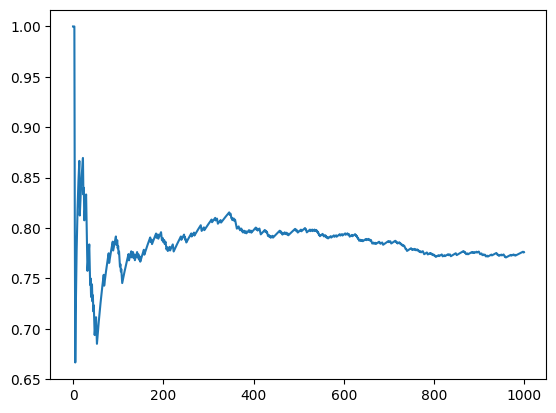

In [32]:
G=estimaciones(1000)
plt.plot(G)

In [29]:
#calculamos la media y la varianza
media=np.mean(G)
desviacion=np.std(G)
print("media= ", media, "desviacion= ",desviacion)


media=  0.7959647597251658 desviacion=  0.024775785499551214


se ve que una muestra de tamaño N≈500 da un resultado aceptable

para modificarla funcion y convertirla en una corrida de la simulacion: l $→$ l[-1] y fijamos N=500 (por ejemplo)

In [ ]:
#se hace este ajuste para que nos regrese el ultimo valor
def estimaciones(N):
  l=[]
  exitos=0
  for i in range (N):
    u1=rnd.uniform(0,1)
    u2=rnd.uniform(0,1)
    if u2<=np.sqrt(1-u1**2):
      exitos+=1
    prob=exitos/(i+1)
    l.append(prob)
  return l[-1]

In [34]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimaciones(500)
    r.append(R)
  return r

(array([[  0.,   0.,   0., ..., 484.,   7.,   9.],
        [  0.,   0.,   0., ..., 489.,   7.,   2.],
        [  1.,   0.,   0., ..., 465.,  12.,   0.],
        ...,
        [  1.,   0.,   0., ...,   5., 489.,   0.],
        [  1.,   0.,   0., ..., 468.,  27.,   0.],
        [  0.,   0.,   0., ..., 473.,   1.,   1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1000 BarContainer objects>)

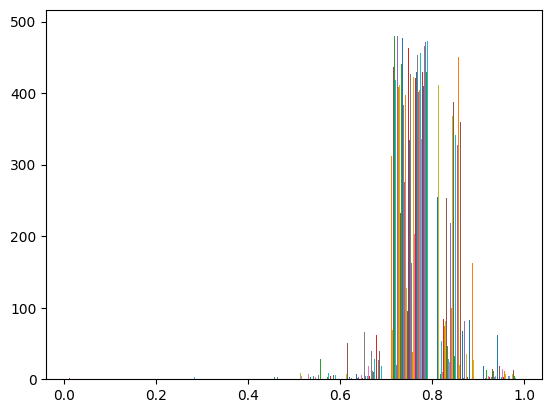

In [36]:
S=simulacion(1000)
plt.hist(S)